In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("placement.csv")
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
#preprocessing
df=df.iloc[:,1:] #to eliminate the 0th column
df.head()

cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0

In [ ]:
df.shape

(100, 3)

In [ ]:
#steps:

# 0. Preprocess +EDA + Feature selection
# 1. Extract input and output columns
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

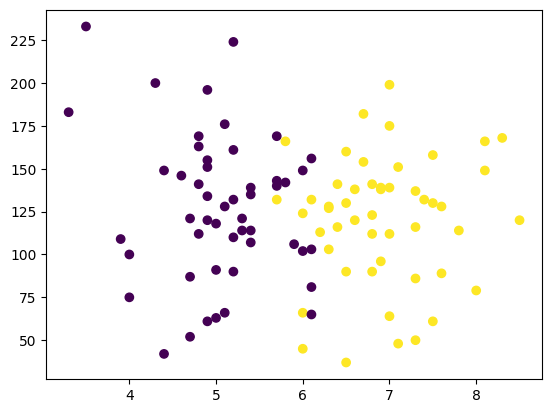

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
#sns.scatterplot(data=df, x='cgpa', y='iq') #both are same, but this also shows the label of the axis
plt.show()

In [ ]:
#Train test split, splits the dataset into training set and testing set

X=df.iloc[:,:2] #1st 2 colns
Y=df.iloc[:,-1] #last coln

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.1)

In [ ]:
X_train

cgpa     iq
38   6.5  160.0
50   3.5  233.0
66   6.9   96.0
29   7.0  112.0
2    5.3  121.0
..   ...    ...
69   8.5  120.0
87   5.7  132.0
75   4.8  169.0
64   7.0   64.0
14   6.1  103.0

[90 rows x 2 columns]

In [ ]:
#Scale the values
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_train

array([[ 0.41801327,  0.89970873],
       [-2.17655185,  2.78582436],
       [ 0.76395528, -0.75387209],
       [ 0.85044079, -0.34047689],
       [-0.61981278, -0.10794208],
       [-0.01441425,  0.61549953],
       [-1.74412433, -0.65052329],
       [ 0.07207125,  0.79635993],
       [ 1.1098973 , -0.23712808],
       [-0.70629828,  0.17626712],
       [ 0.85044079,  0.35712753],
       [ 1.36935381, -0.93473249],
       [-1.0522403 , -0.34047689],
       [ 1.71529583, -1.1931045 ],
       [-0.87926929, -0.88305809],
       [ 0.07207125, -1.1414301 ],
       [-0.70629828,  0.92554593],
       [ 0.93692629,  0.66717393],
       [-0.01441425, -0.59884889],
       [ 0.50449877,  0.33129032],
       [-0.53332727,  0.25377872],
       [ 0.15855676, -0.31463968],
       [ 0.67746978, -0.05626768],
       [ 0.41801327, -2.27826691],
       [ 0.33152776, -0.23712808],
       [ 0.76395528,  0.33129032],
       [ 0.93692629, -1.99405771],
       [ 1.36935381,  0.07291832],
       [ 0.07207125,

In [ ]:
X_test=scaler.fit_transform(X_test)

In [ ]:
X_test

array([[-0.60513141, -0.42056749],
       [-0.92930895,  0.91561048],
       [ 0.69157876,  0.69656491],
       [ 1.88022975, -1.05579964],
       [ 0.79963794,  0.45561478],
       [-0.06483551,  1.3098925 ],
       [ 0.04322367,  1.24417883],
       [ 0.79963794, -0.42056749],
       [-1.46960486, -1.47198622],
       [-1.14542732, -1.25294065]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
#model training
clf.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
Y_test

28    0
89    0
54    1
44    1
57    1
84    0
85    1
79    1
96    0
94    0
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test, Y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

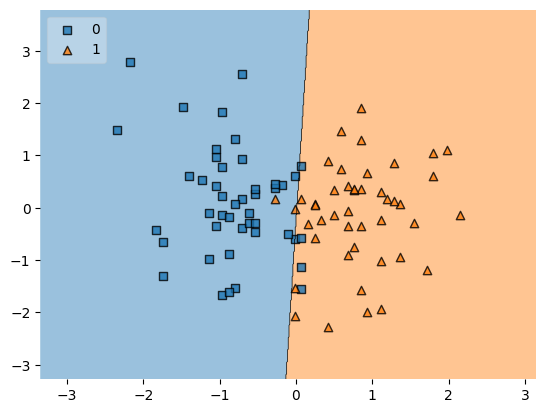

In [ ]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open("model.pkl", "wb"))